<a href="https://colab.research.google.com/github/ashaduzzaman-sarker/Fashion-MNIST-dataset-Classification-with-CNN/blob/main/Image_classification_on_the_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST dataset : Classification with CNN
---

Fashion MNIST dataset into 10 different categories. The objective is to achieve high accuracy in classifying the images.

**Fashion MNIST dataset Description:**

In this project, I developed a Convolutional Neural Network (CNN) classifier using Keras for the Fashion-MNIST dataset, which consists of 60,000 training images and 10,000 test images. Each image is 28x28 pixels and belongs to one of the following categories:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

The CNN has 4 convolutional layers with batch normalization applied to each layer.
Initially, the model was trained for 10 epochs with a batch size of 256, using categorical crossentropy loss and the Adam optimizer. Following this, data augmentation techniques were employed, including rotation, shifting, and zooming, to generate new training samples. The model was then trained for an additional 50 epochs.

To prevent overfitting, the original training data was split into 80% training (48,000 images) and 20% validation (12,000 images) sets. This allowed for monitoring of validation accuracy and detection of overfitting. Finally, the model's accuracy was evaluated on the test data to assess its generalization performance.


## Data Loading

In [2]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Load Fashion Mnist Dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Data Exploration

In [4]:
# Understand the dataset
print('Training Images Shape:', train_images.shape)
print('Training Labels Shape:', train_labels.shape)
print('Test Images Shape:', test_images.shape)
print('Test Labels Shape:', test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [5]:
# Class names for visualization
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Print the class names along with their numeric labels
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


In [6]:
# Check for Class Imbalance
unique_classes, class_counts = np.unique(train_labels, return_counts=True)

# Map class indices to class names
class_distribution = dict(zip(class_names, class_counts))
print('Class Distribution:')
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")

Class Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


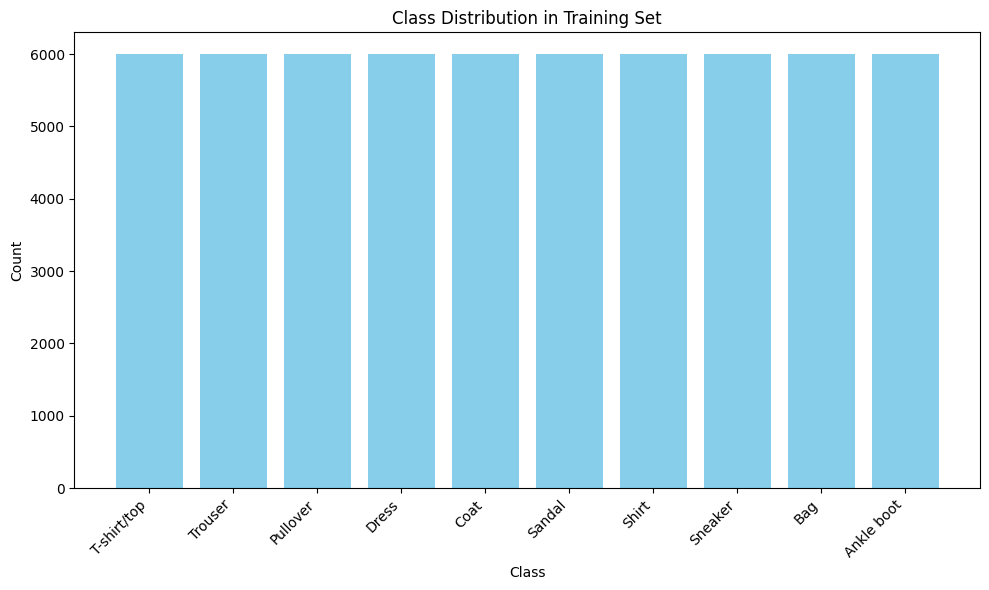

In [7]:
# Plot class distribution with class names in Training Set
plt.figure(figsize=(10,6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

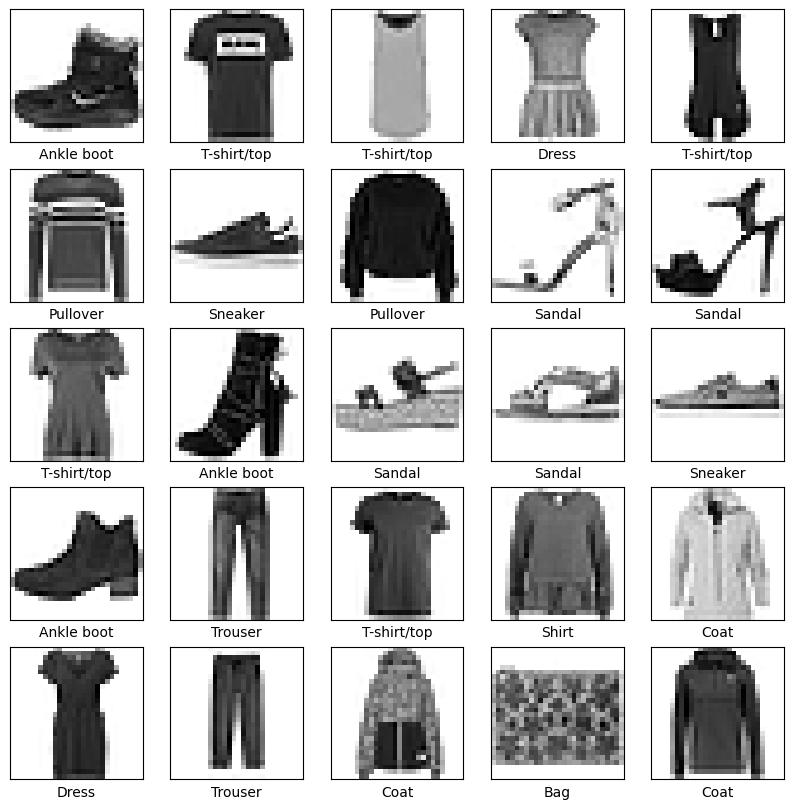

In [8]:
# Visualize Sample Images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Data Processing

In [9]:
# Reshape images to (28,28,1) and normalize pixel values to range[0,1]
train_images = train_images.reshape(-1,28,28,1).astype('float32')/255.0
test_images = test_images.reshape(-1,28,28,1).astype('float32')/255.0

In [10]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
# Convert Labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

## Building Baseline CNN Model



**4 Convolutional Layers:**
- **Conv2D layers:**
The Conv2D layers are used for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map.

- **MaxPooling2D:**
The MaxPooling2D layers are used for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters.
- **BatchNormalization:**
Batch Normalization reduces the amount by what the hidden unit values shift around (covariance shift). Also, it allows each layer of a network to learn by itself a little bit more independently of other layers.
- **Dropout layers:**
Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase.
- **Fully-connected layers:**
These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor.

In [12]:
# Split original training data to training (80%) and validation data(20%)
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [13]:
input_shape=X_train.shape[1:]
input_shape

(28, 28, 1)

In [14]:
# BBuilding CNN Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization

def get_model():
  model = Sequential()

  model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  return model

In [15]:
model = get_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

###  Data Augmentation

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3,
    zoom_range=0.08
)

# Create generator objects for training and validation data
train_batches = datagen.flow(X_train, y_train, batch_size=64)
val_batches = datagen.flow(X_val, y_val, batch_size=64)

## Train the Model

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

In [23]:
# Train the model
history = model.fit(train_batches,
                    epochs=20,
                    validation_data=val_batches,
                    callbacks=[reduce_lr, early_stopping],
                    verbose=2,
                    use_multiprocessing=True)

Epoch 1/20


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


750/750 - 48s - loss: 0.6677 - accuracy: 0.7624 - val_loss: 0.4218 - val_accuracy: 0.8409 - lr: 0.0010 - 48s/epoch - 64ms/step
Epoch 2/20
750/750 - 38s - loss: 0.4311 - accuracy: 0.8458 - val_loss: 0.4160 - val_accuracy: 0.8489 - lr: 0.0010 - 38s/epoch - 50ms/step
Epoch 3/20
750/750 - 37s - loss: 0.3784 - accuracy: 0.8653 - val_loss: 0.4177 - val_accuracy: 0.8427 - lr: 0.0010 - 37s/epoch - 50ms/step
Epoch 4/20
750/750 - 39s - loss: 0.3470 - accuracy: 0.8747 - val_loss: 0.2942 - val_accuracy: 0.8924 - lr: 0.0010 - 39s/epoch - 51ms/step
Epoch 5/20
750/750 - 38s - loss: 0.3288 - accuracy: 0.8818 - val_loss: 0.2797 - val_accuracy: 0.8990 - lr: 0.0010 - 38s/epoch - 50ms/step
Epoch 6/20
750/750 - 37s - loss: 0.3063 - accuracy: 0.8904 - val_loss: 0.3056 - val_accuracy: 0.8866 - lr: 0.0010 - 37s/epoch - 50ms/step
Epoch 7/20
750/750 - 38s - loss: 0.3032 - accuracy: 0.8917 - val_loss: 0.2578 - val_accuracy: 0.9040 - lr: 0.0010 - 38s/epoch - 51ms/step
Epoch 8/20
750/750 - 37s - loss: 0.2837 - acc

## Results

In [24]:
# Evaluating the Optimal Model on Test Data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Print the test accuracy and loss
print('\nTest Accuracy:', test_accuracy)
print('Test Loss:    ', test_loss)


Test Accuracy: 0.9243000149726868
Test Loss:     0.2080511748790741


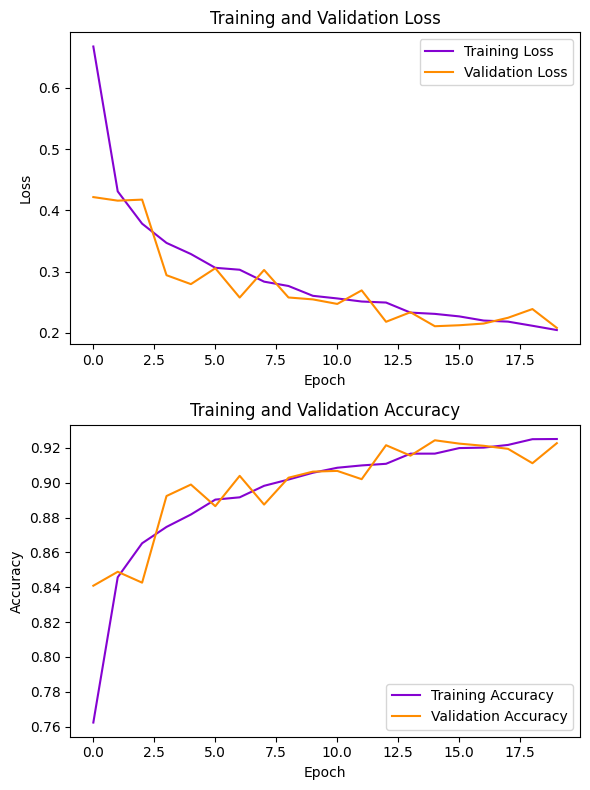

In [37]:
# Set figure size
plt.figure(figsize=(6, 8))
# Plotting the training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', color='#8502d1')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting the training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#8502d1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## Classification Report


In [40]:
# Get the predictions for the test data
predictions = model.predict(test_images)

# Convert predictions to classes by finding the index of the maximum value for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels for the test data
y_true = np.argmax(test_labels, axis=1)  # Assuming y_test is one-hot encoded

# Find the indices of correct and incorrect predictions
correct_indices = np.where(predicted_classes == y_true)[0]
incorrect_indices = np.where(predicted_classes != y_true)[0]


313/313 [==============================] - 1s 3ms/step


In [41]:
from sklearn.metrics import classification_report

# Define target names for classes
target_names = ["Class {}".format(i) for i in range(10)]

# Generate classification report
report = classification_report(y_true, predicted_classes, target_names=target_names)

# Print the classification report
print(report)


              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.83      0.87      1000
     Class 3       0.96      0.90      0.93      1000
     Class 4       0.84      0.94      0.88      1000
     Class 5       0.97      1.00      0.98      1000
     Class 6       0.74      0.83      0.79      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



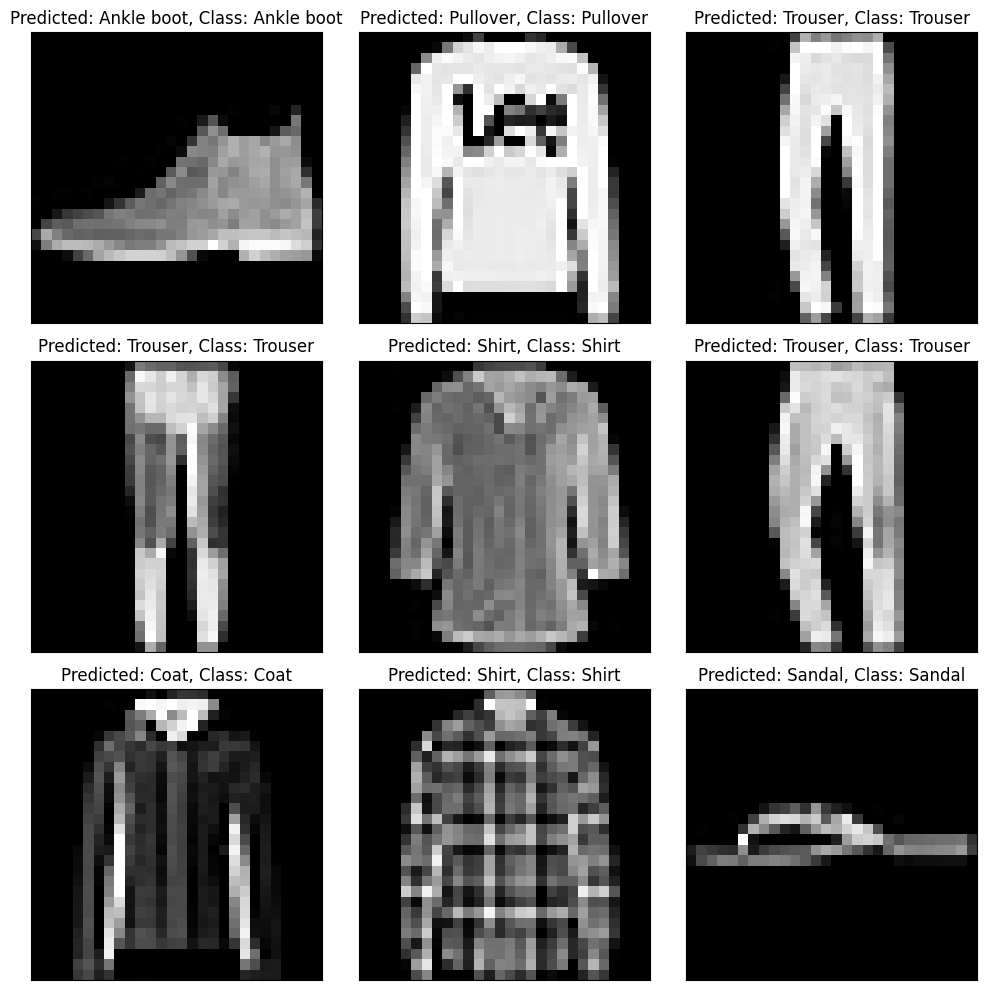

In [43]:
# Display some correctly classified images
plt.figure(figsize=(10, 10))
for i, correct_idx in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[correct_idx].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Class: {}".format(class_names[predicted_classes[correct_idx]],
                                              class_names[y_true[correct_idx]]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


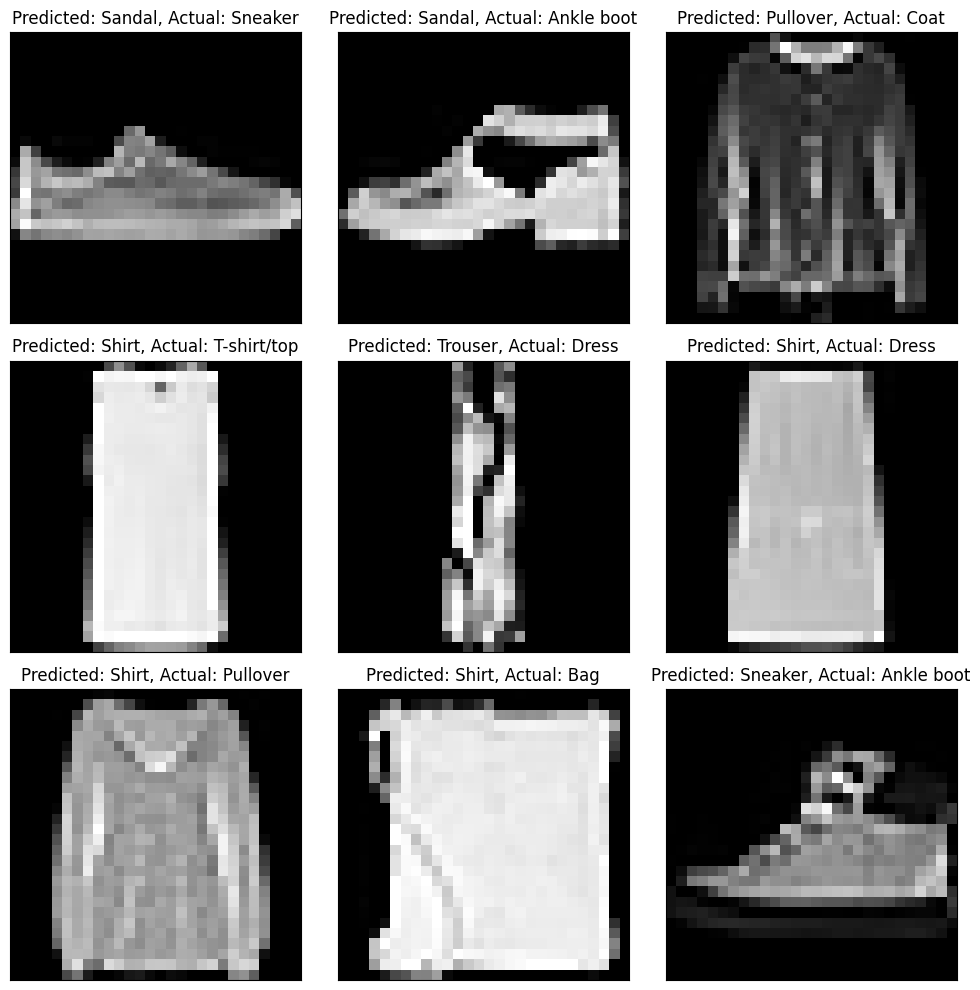

In [44]:
# Display some incorrectly classified images
plt.figure(figsize=(10, 10))
for i, incorrect_idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[incorrect_idx].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(class_names[predicted_classes[incorrect_idx]],
                                               class_names[y_true[incorrect_idx]]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [45]:
# Save the model
model.save('Fashion_MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Performance on an Out-of-Dataset Image

In [50]:
from keras.models import load_model
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Load the saved model
model = load_model('Fashion_MNIST.h5')

In [53]:
# Function to preprocess images
def preprocess_image(img):
    # Resize the image to match the input size of the model
    img = img.resize((28, 28))
    # Convert the image to grayscale
    img = img.convert('L')
    # Convert the image to a NumPy array and normalize pixel values
    img_array = np.array(img) / 255.0
    # Reshape the image array to match the model's input shape
    img_array = img_array.reshape((1, 28, 28, 1))
    return img_array

# URLs of the internet images for evaluation
image_urls = [
    'https://pluspoint.com.bd/images/media/2023/03/syJac20911.jpg',
    # 'https://img.freepik.com/free-photo/vertical-shot-concentrated-businessman-listening-carefully-with-crossed-hands_181624-29443.jpg',
    # Add more image URLs as needed
]

for url in image_urls:
    # Fetch the image from the internet
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # Preprocess the image
    processed_img = preprocess_image(img)
    # Make predictions using the model
    prediction = model.predict(processed_img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    # Print the predicted class name
    print(f'Predicted class : {predicted_class_name}')

1/1 [==============================] - 0s 18ms/step
Predicted class : T-shirt/top


## Summary of Fashion MNIST Model Performance and Findings

Here's a concise summary of my models results and findings:

- Achieved a test accuracy of 92.43% and a test loss of 0.208, indicating the model's strong performance in accurately classifying fashion items.
- Precision, recall, and F1-score metrics demonstrate consistent performance across all classes, with particularly high scores for classes 1, 5, 7, 8, and 9, showcasing the model's effectiveness in distinguishing between different fashion categories.
- Notable findings include the model's robustness in handling various types of clothing items, with minor discrepancies in precision and recall for specific classes, suggesting potential areas for further optimization.
- Overall, the results underscore the efficacy of the trained model in accurately categorizing fashion items, laying a solid foundation for practical applications in retail, e-commerce, and inventory management.